In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams["figure.dpi"] = 150
import ipywidgets as widgets
from particle import PDGID

In [2]:
sensorAngles = np.arange(-np.pi,np.pi+2*np.pi/8,np.pi/8)

In [3]:
sig = pd.read_csv('/home/elizahoward/Muon_Collider_Smart_Pixels/Data_Files/Data_Set_flp_0/Track_Lists/signal_tracks_extra_info_0.txt', sep=' ')

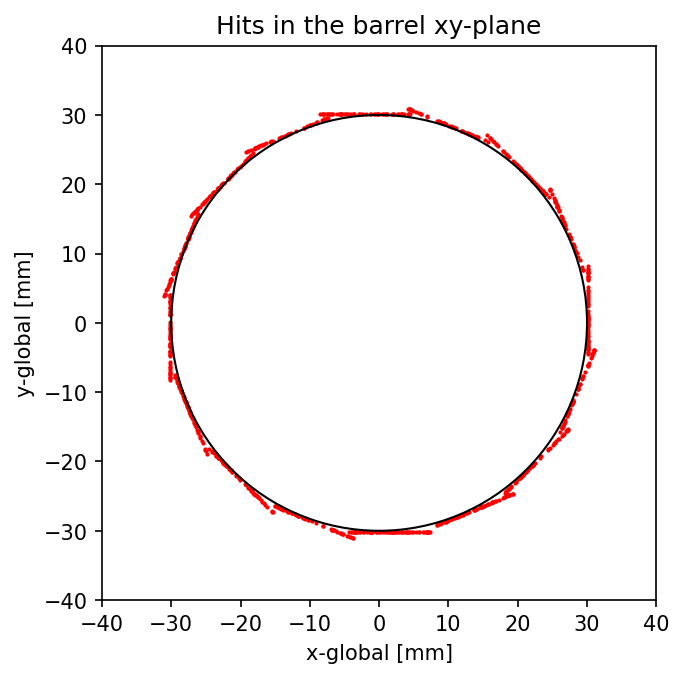

In [4]:
fig,ax=plt.subplots()
ax.scatter(sig['hit_x'],sig["hit_y"],s=1, c='r', label="Signal hits")
plt.gca().set_aspect('equal')
circle=plt.Circle((0,0), 30, fill=0, color='k', label="Barrel")
ax.add_patch(circle)
ax.set_title("Hits in the barrel xy-plane")
ax.set_xlabel("x-global [mm]")
ax.set_ylabel("y-global [mm]")
ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
plt.show()

In [14]:
Vec0 = []
Vec1 = []
Vec11 = []
Q=[]
p_from_angles = []

for x, y, phi, theta, cota, cotb, pt, pid, gamma in zip(sig['hit_x'],sig['hit_y'],sig['phi'],sig['theta'],sig['cota'],sig['cotb'],sig['pt'],sig['hit_pdg'],sig['gamma']):

    x0=np.cos(phi)
    y0=np.sin(phi)

    Vec0.append((x0,y0))

    beta = phi-(gamma-np.pi/2)

    if beta < -np.pi:
        beta += 2*np.pi
    if beta > np.pi:
        beta -= 2*np.pi

    xp=np.cos(beta)
    yp=np.sin(beta)
    
    Vec1.append((xp,yp))

    Q.append(PDGID(pid).charge)

    nz=1/(cota**2+cotb**2)
    ny=cotb*nz
    nx=cota*nz
    # for alternate vector, scale to magnitude=1
    Vec11.append((ny/np.sqrt(nz**2+ny**2), nz/np.sqrt(nz**2+ny**2)))

    p_from_angles.append(pt / np.sqrt((nz**2 + ny**2)))

sig['vec0'] = Vec0
sig['vec1'] = Vec1
sig['vec11'] = Vec11
sig['Q']=Q
sig['p_from_angles']=p_from_angles

In [23]:

def plot(angleIndex,i,use_weird_tracks=False):
    cut = np.abs(sig['gamma'] - sensorAngles[angleIndex])<0.01
    if use_weird_tracks:
        cut2=abs(sig['p']-sig['p_from_angles'])>10
        cut = cut & cut2
    # Pull single point and vector
    vec0 = sig['vec0'][cut].reset_index(drop=True)[i]
    vec1 = sig['vec1'][cut].reset_index(drop=True)[i]
    vec11 = sig['vec11'][cut].reset_index(drop=True)[i]
    x0 = sig['hit_x'][cut].reset_index(drop=True)[i]
    y0 = sig['hit_y'][cut].reset_index(drop=True)[i]
    y1 = sig['ylocal'][cut].reset_index(drop=True)[i]

    fig,ax=plt.subplots(ncols=2)
    ax[0].scatter(sig['hit_x'][cut],sig['hit_y'][cut],s=1, c='r')
    ax[0].scatter(x0,y0,c='b')
    ax[0].quiver(x0,y0,vec0[0],vec0[1],scale=10)
    ax[0].quiver(0,0,np.cos(sensorAngles[angleIndex]),np.sin(sensorAngles[angleIndex]),scale=10)
    plt.gca().set_aspect('equal')
    circle=plt.Circle((0,0), 30, fill=0, color='k')
    ax[0].add_patch(circle)
    ax[0].set_title("BIB hit location in xy-plane")
    ax[0].set_xlabel("x [mm]")
    ax[0].set_ylabel("y [mm]")
    ax[0].set_xlim(-40,40)
    ax[0].set_ylim(-40,40)
    ax[0].set_aspect('equal')

    ax[1].scatter(y1,0,c='b')
    ax[1].quiver(y1,0,vec1[0],vec1[1],scale=10,color="k")
    ax[1].quiver(y1,0,vec11[0],vec11[1],scale=10,color="b")
    ax[1].hlines(y=0,color='r',xmin=-4.5,xmax=8.5)
    ax[1].set_xlim(-5.5, 9.5) 
    ax[1].set_ylim(-1, 2) 
    ax[1].invert_xaxis()

    ax[1].set_title(f'Total Range: {y1}; ylocal={sig['ylocal'][i]}')

    plt.show()

In [24]:
widgets.interact(plot, angleIndex=widgets.IntSlider(min=1, max=16, step=1), i=widgets.IntSlider(min=0, max=100, step=1),use_werid_hits=False)


interactive(children=(IntSlider(value=1, description='angleIndex', max=16, min=1), IntSlider(value=0, descript…

<function __main__.plot(angleIndex, i, use_weird_tracks=False)>

In [27]:
cut=abs(sig['p']-sig['p_from_angles'])>50
len(sig[cut])

255

In [26]:
len(cut)

999

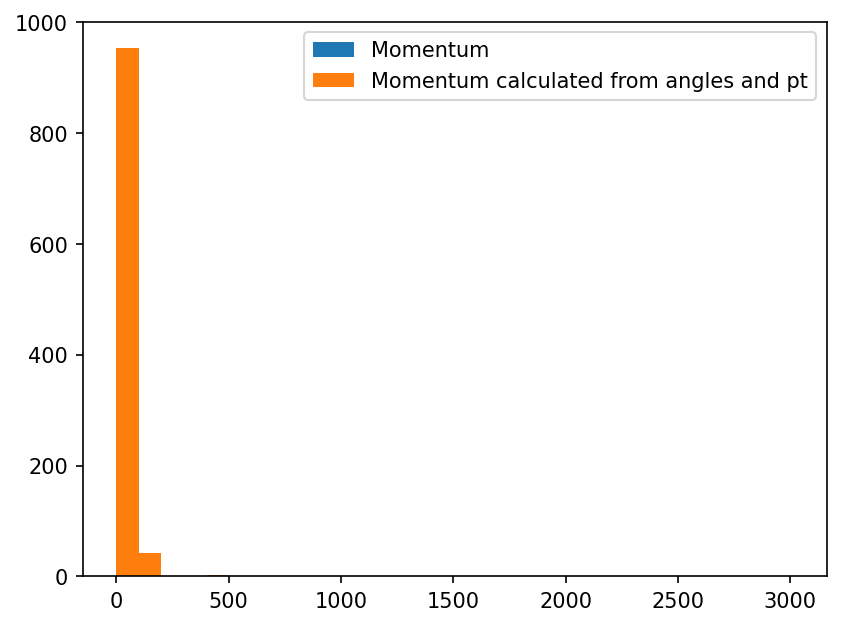

In [29]:
plt.hist(sig['p'],bins=30,label="Momentum")
plt.hist(sig['p_from_angles'],bins=30,label="Momentum calculated from angles and pt")
plt.legend()
plt.show()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0., 150., 846.]),
 array([-2978.53736396, -2875.9738054 , -2773.41024684, -2670.84668829,
        -2568.28312973, -2465.71957117, -2363.15601261, -2260.59245406,
        -2158.0288955 , -2055.46533694, -1952.90177839, -1850.33821983,
        -1747.77466127, -1645.21110271, -1542.64754416, -1440.0839856 ,
        -1337.52042704, -1234.95686848, -1132.39330993, -1029.82975137,
         -927.26619281,  -824.70263426,  -722.1390757 ,  -619.57551714,
         -517.01195858,  -414.44840003,  -311.88484147,  -209.32128291,
         -106.75772436,    -4.1941658 ,    98.36939276]),
 <BarContainer object of 30 artists>)

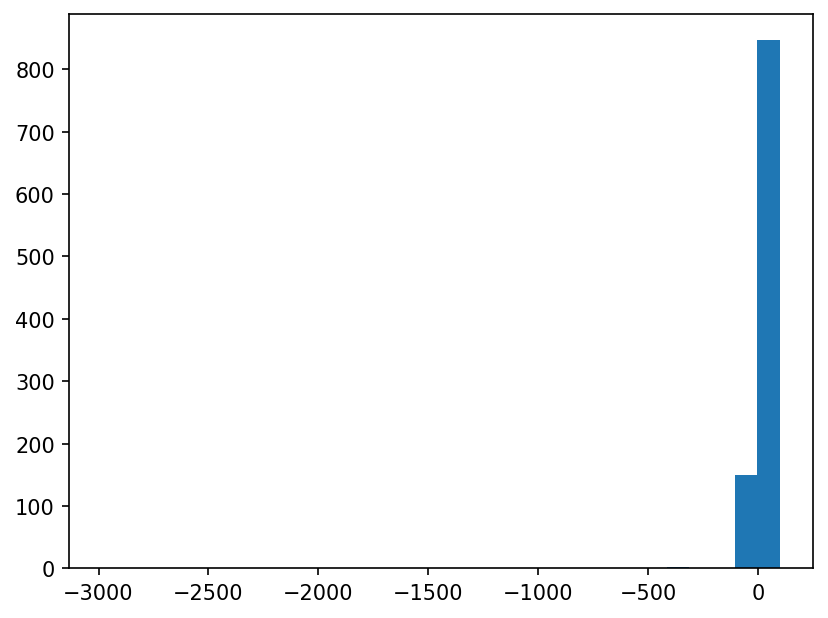

In [31]:
plt.hist(sig['p']-sig['p_from_angles'], bins=30)

In [ ]:
S